In [1]:
import os
import numpy as np
import pandas as pd
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
from scipy import stats 
import math

Populating the interactive namespace from numpy and matplotlib


In [2]:
filepath = "C:/Users/user/Desktop/data/Ames_Housing_Data.tsv"
data = pd.read_csv(filepath, sep='\t')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
print (data.shape)
print (data.dtypes)
print (data.describe())
print (data.columns.tolist())

(2930, 82)
Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  2

In [4]:
data.corr()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


In [5]:
features= data.loc[:,['Garage Area', 'Garage Cars', '1st Flr SF', 'Total Bsmt SF', 'Gr Liv Area', 'Overall Qual', 'SalePrice']]
features

,Garage Area,Garage Cars,1st Flr SF,Total Bsmt SF,Gr Liv Area,Overall Qual,SalePrice
0,528.0,2.0,1656,1080.0,1656,6,215000
1,730.0,1.0,896,882.0,896,5,105000
2,312.0,1.0,1329,1329.0,1329,6,172000
3,522.0,2.0,2110,2110.0,2110,7,244000
4,482.0,2.0,928,928.0,1629,5,189900
...,...,...,...,...,...,...,...
2925,588.0,2.0,1003,1003.0,1003,6,142500
2926,484.0,2.0,902,864.0,902,5,131000
2927,0.0,0.0,970,912.0,970,5,132000
2928,418.0,2.0,1389,1389.0,1389,5,170000


In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Area    2929 non-null   float64
 1   Garage Cars    2929 non-null   float64
 2   1st Flr SF     2930 non-null   int64  
 3   Total Bsmt SF  2929 non-null   float64
 4   Gr Liv Area    2930 non-null   int64  
 5   Overall Qual   2930 non-null   int64  
 6   SalePrice      2930 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 160.4 KB


In [7]:
features.describe()

,Garage Area,Garage Cars,1st Flr SF,Total Bsmt SF,Gr Liv Area,Overall Qual,SalePrice
count,2929.000000,2929.000000,2930.000000,2929.000000,2930.000000,2930.000000,2930.000000
mean,472.819734,1.766815,1159.557679,1051.614544,1499.690444,6.094881,180796.060068
std,215.046549,0.760566,391.890885,440.615067,505.508887,1.411026,79886.692357
min,0.000000,0.000000,334.000000,0.000000,334.000000,1.000000,12789.000000
25%,320.000000,1.000000,876.250000,793.000000,1126.000000,5.000000,129500.000000
50%,480.000000,2.000000,1084.000000,990.000000,1442.000000,6.000000,160000.000000
75%,576.000000,2.000000,1384.000000,1302.000000,1742.750000,7.000000,213500.000000
max,1488.000000,5.000000,5095.000000,6110.000000,5642.000000,10.000000,755000.000000


In [8]:
features = features.fillna(0)

features.head()

In [10]:
features.value_counts('Overall Qual')

Overall Qual
5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
dtype: int64

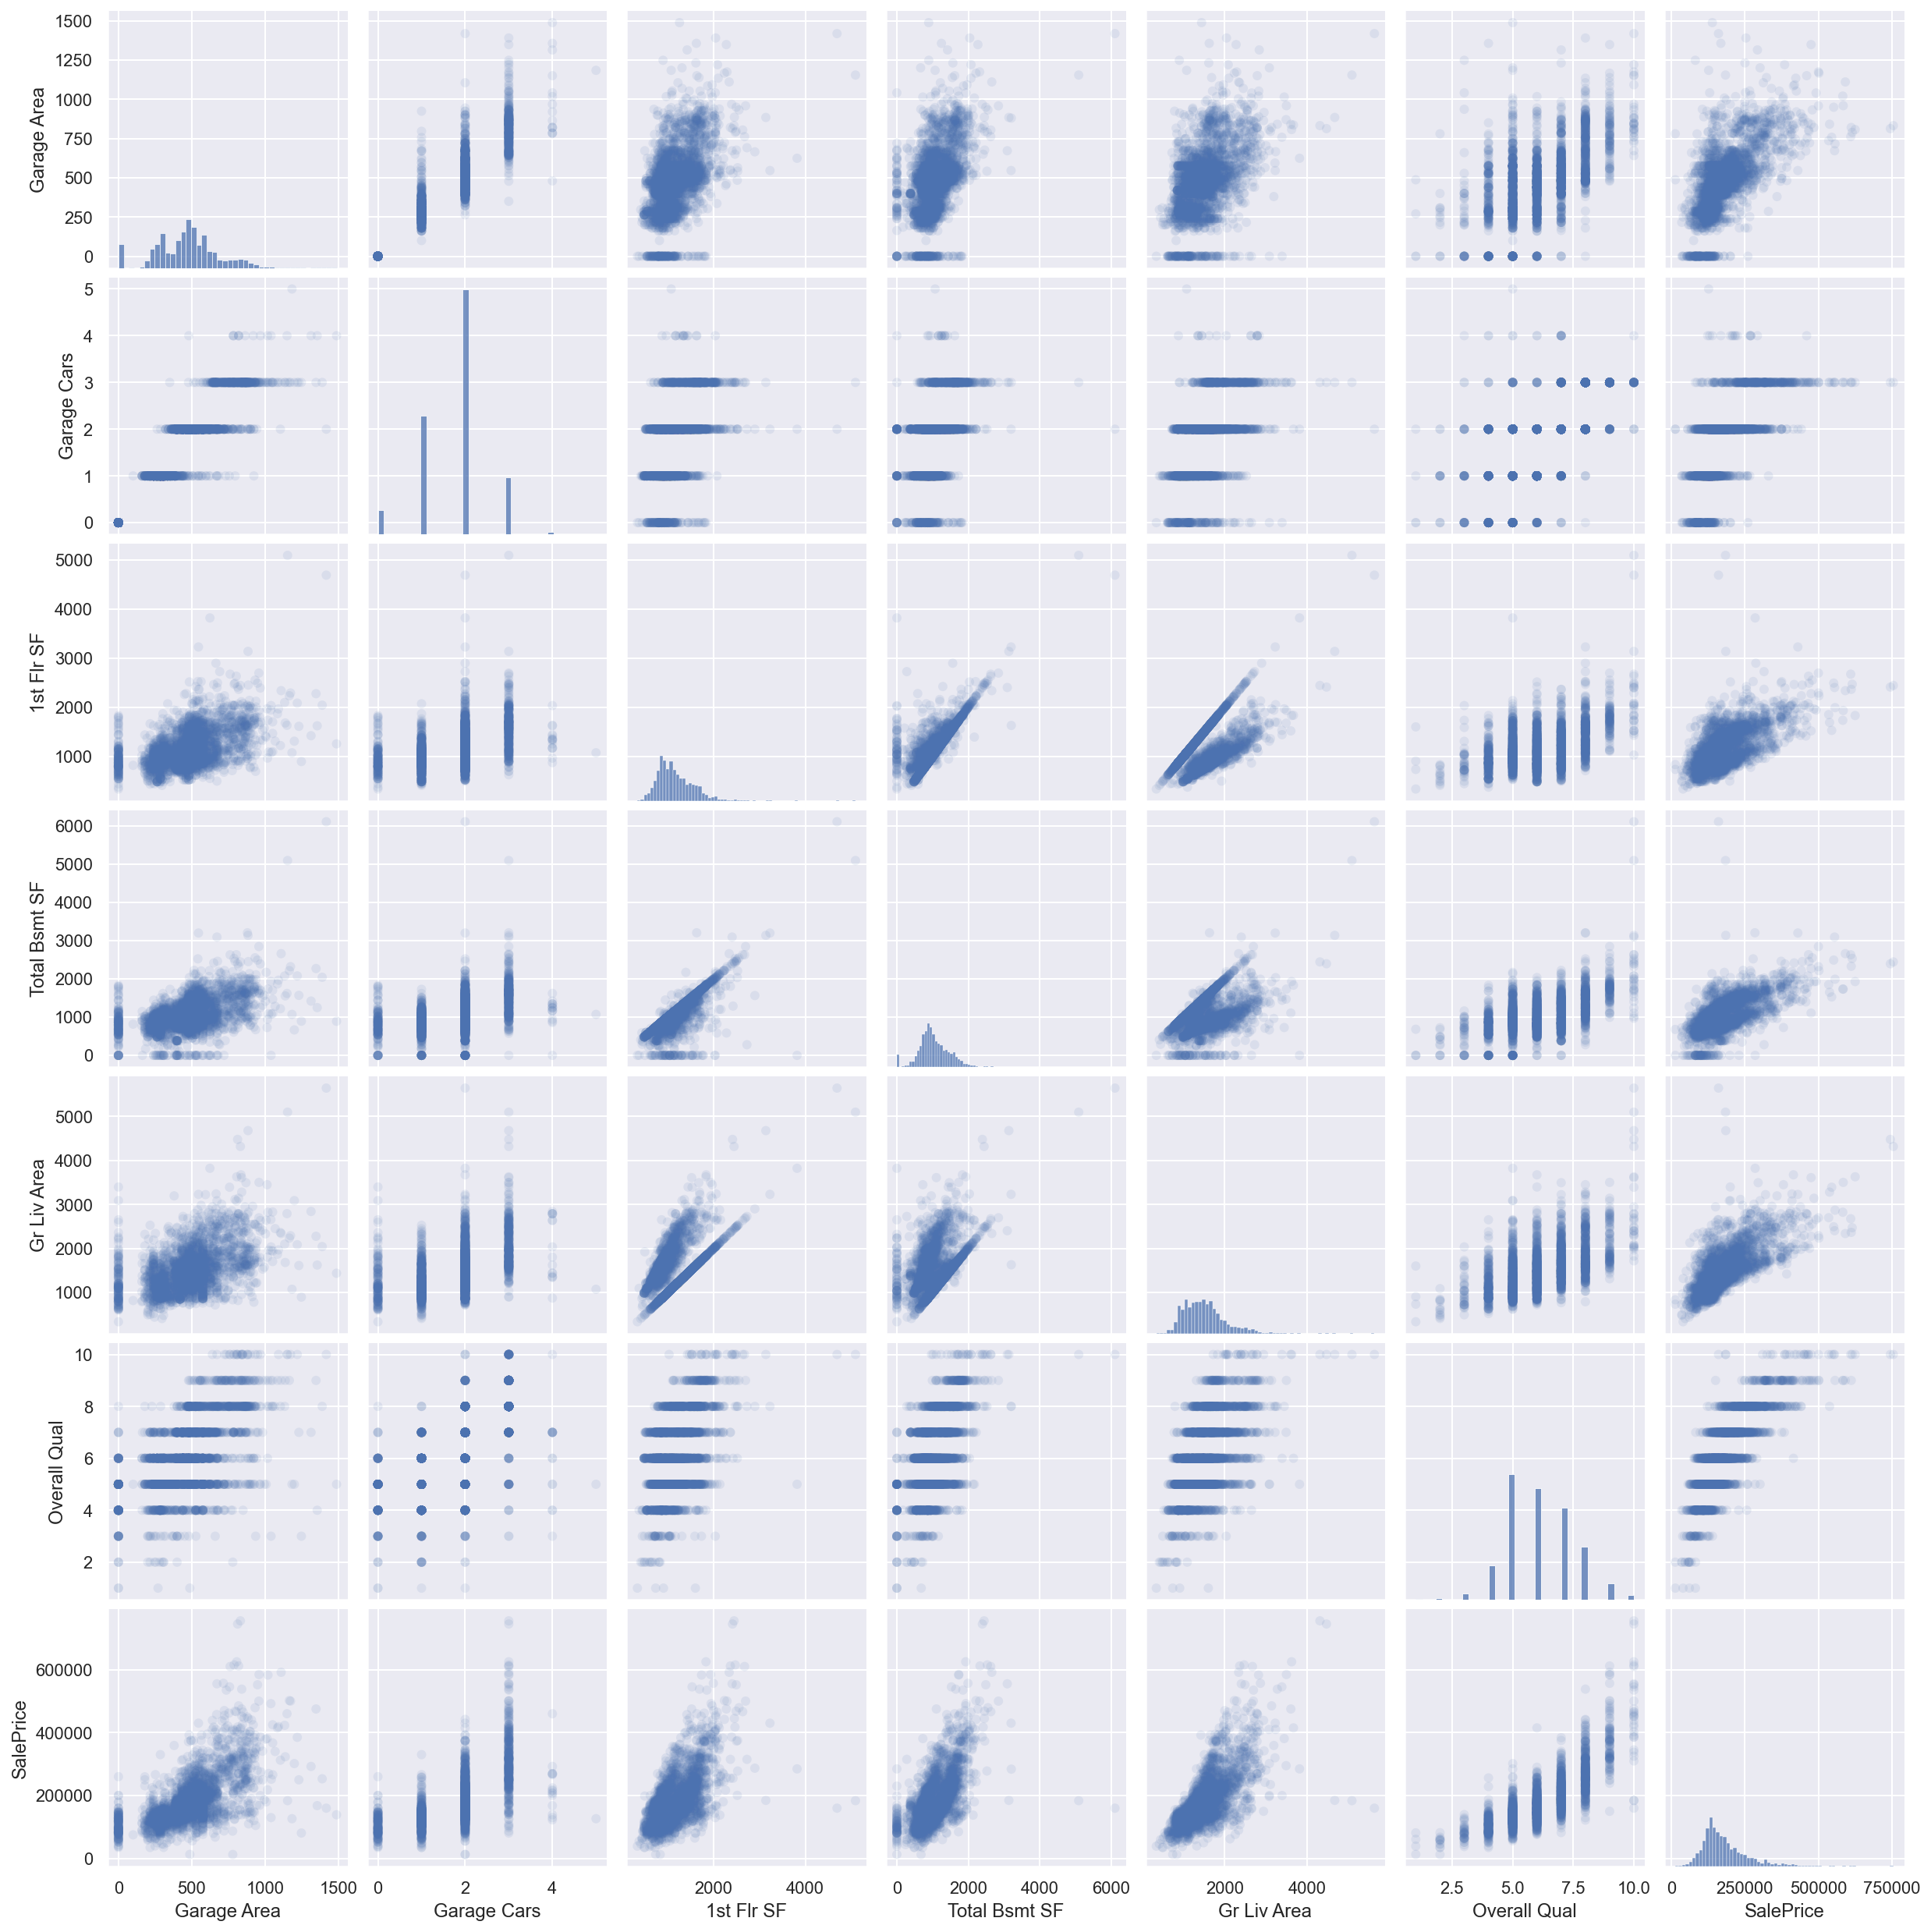

In [11]:
sns.pairplot(features, plot_kws=dict(alpha=.1, edgecolor='none'))

In [12]:
features.groupby('Overall Qual').mean().reset_index

<bound method DataFrame.reset_index of               Garage Area  Garage Cars   1st Flr SF  Total Bsmt SF  \
Overall Qual                                                         
1              189.250000     0.750000   892.750000     170.750000   
2              253.153846     0.923077   618.384615     325.846154   
3              279.750000     1.025000   903.475000     529.100000   
4              319.159292     1.154867   930.570796     732.995575   
5              384.209697     1.368485  1069.505455     933.115152   
6              436.780055     1.703552  1075.769126     974.698087   
7              524.053156     2.044850  1171.656146    1093.526578   
8              671.202857     2.460000  1453.594286    1405.797143   
9              772.570093     2.794393  1751.084112    1738.971963   
10             895.451613     2.935484  2199.354839    2217.354839   

              Gr Liv Area      SalePrice  
Overall Qual                              
1              892.750000   48725.

In [13]:
features['OQ2'] = features['Overall Qual'] ** 2
features['GLA2'] = features['Gr Liv Area'] ** 2

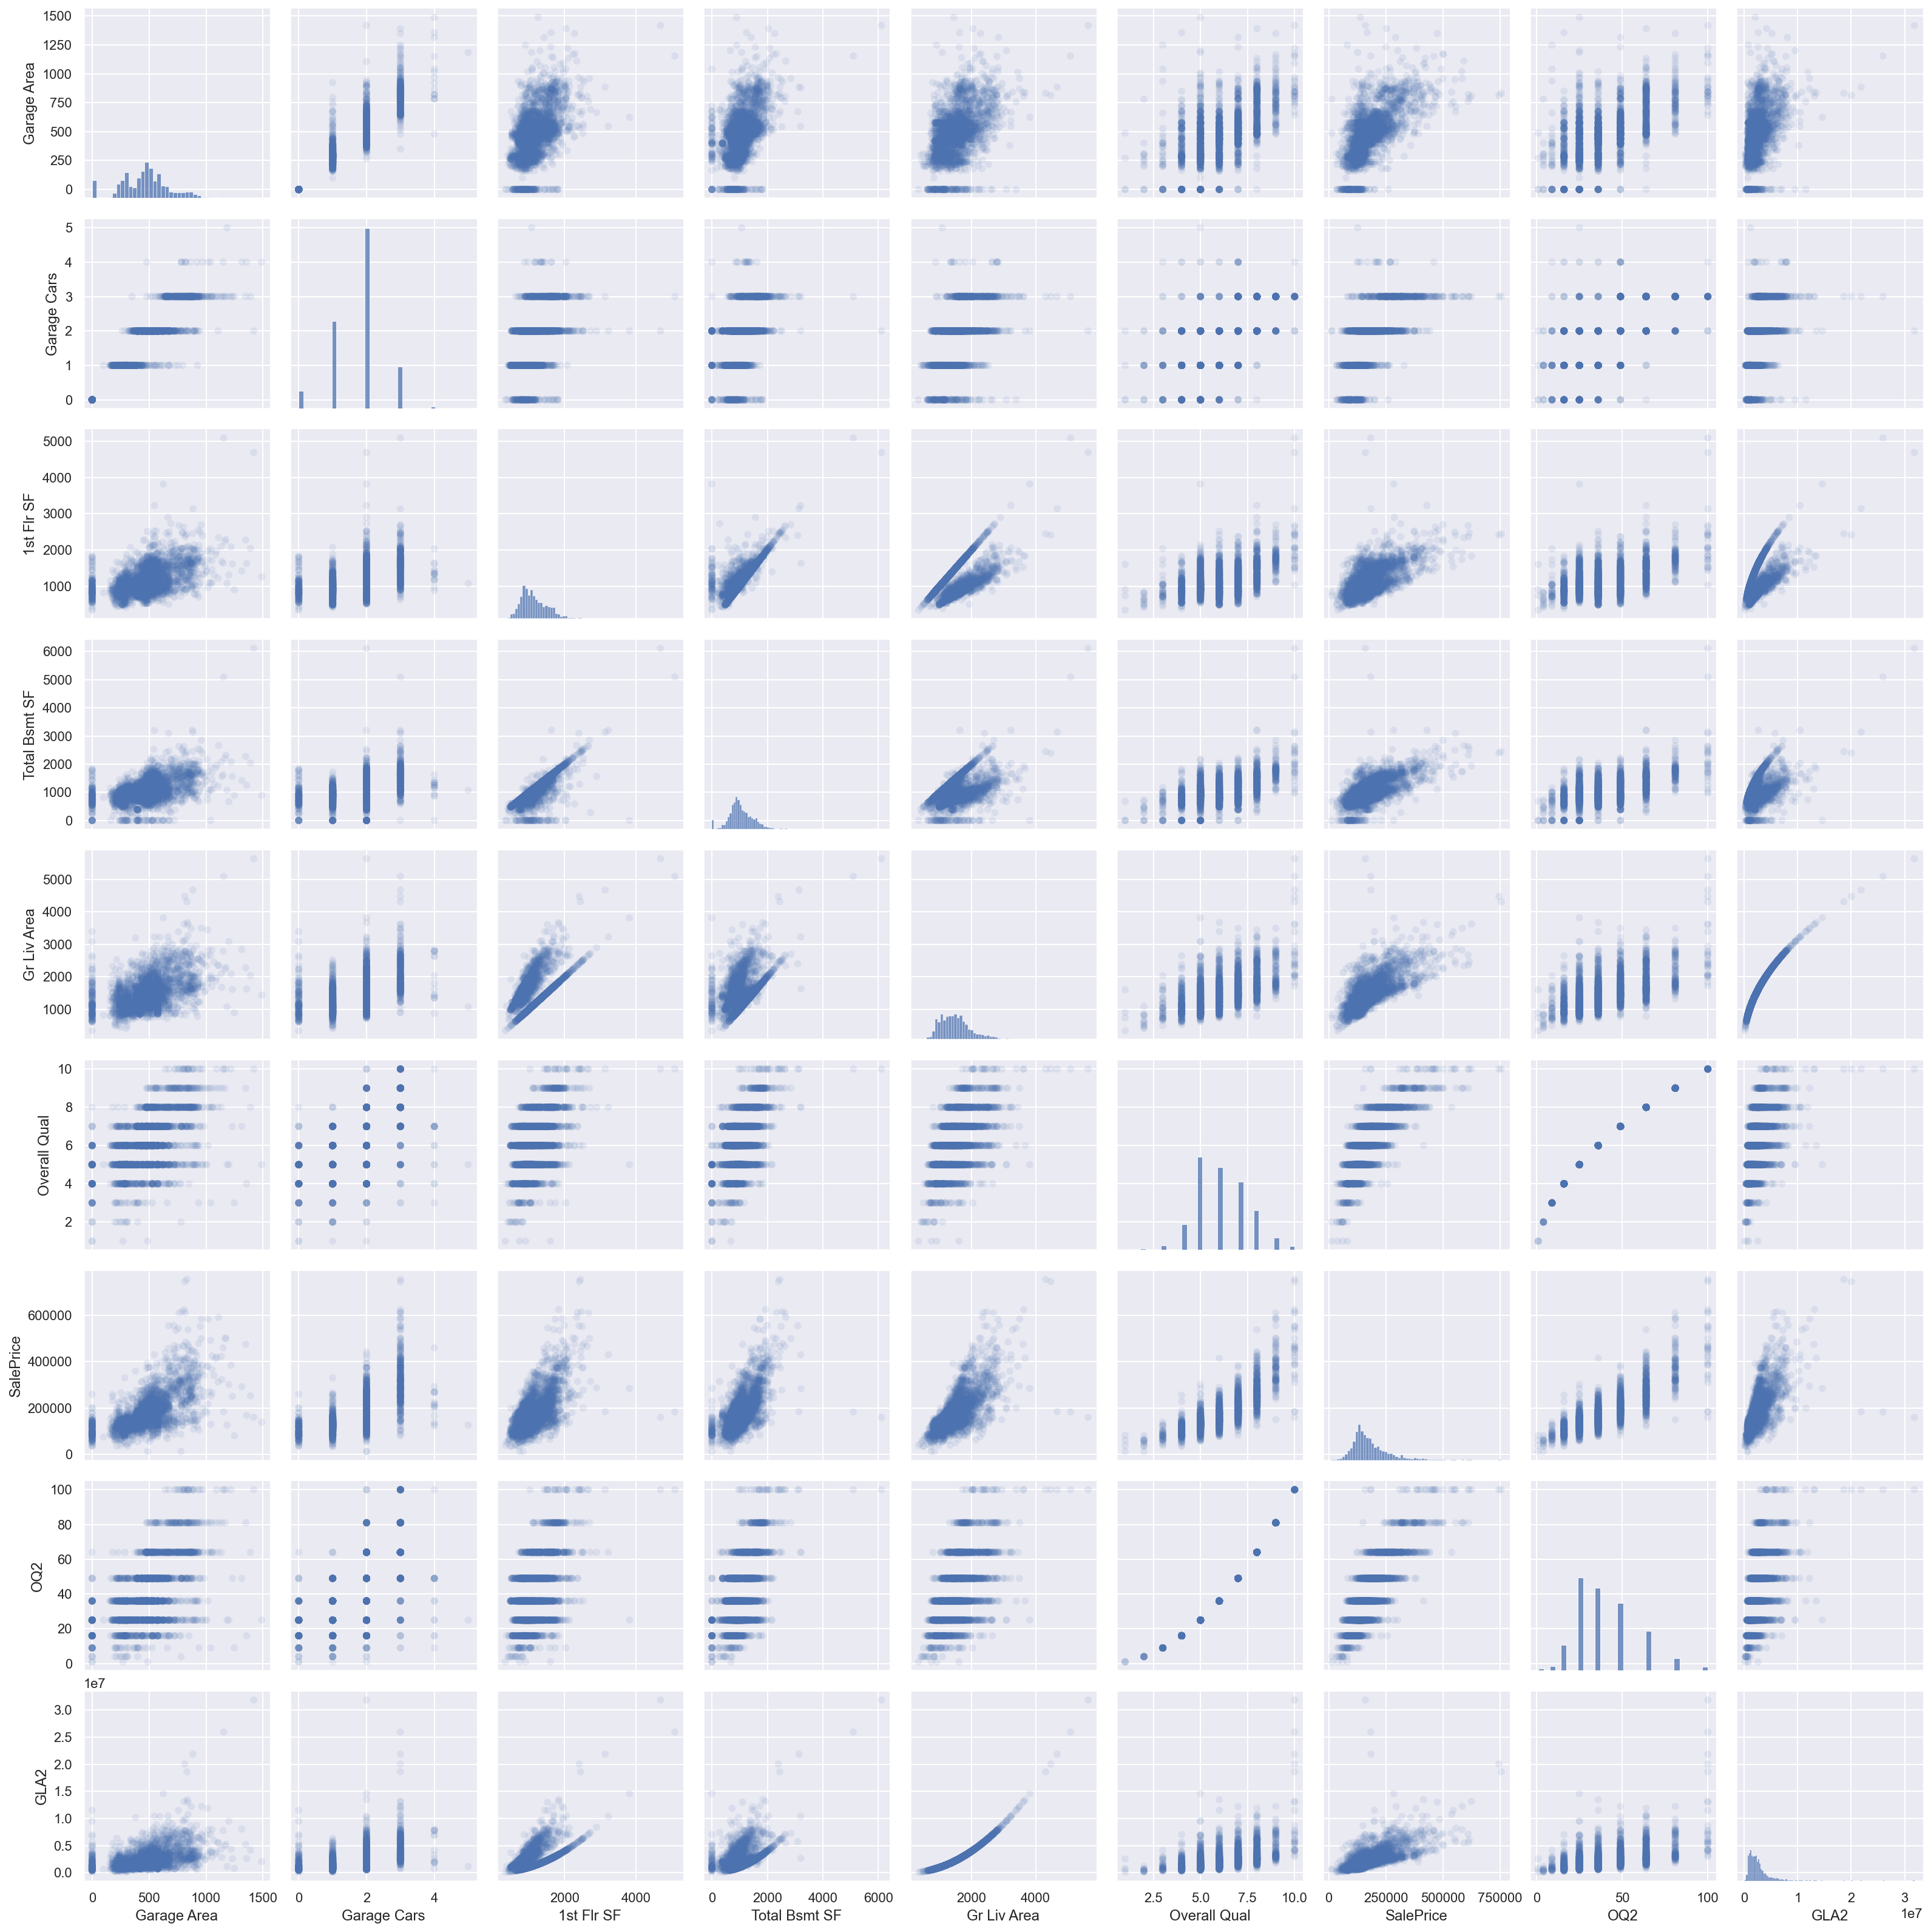

In [15]:
X= features.copy()

In [18]:
X

,Garage Area,Garage Cars,1st Flr SF,Total Bsmt SF,SalePrice,OQ2,GLA2
0,528.0,2.0,1656,1080.0,215000,36,2742336
1,730.0,1.0,896,882.0,105000,25,802816
2,312.0,1.0,1329,1329.0,172000,36,1766241
3,522.0,2.0,2110,2110.0,244000,49,4452100
4,482.0,2.0,928,928.0,189900,25,2653641
...,...,...,...,...,...,...,...
2925,588.0,2.0,1003,1003.0,142500,36,1006009
2926,484.0,2.0,902,864.0,131000,25,813604
2927,0.0,0.0,970,912.0,132000,25,940900
2928,418.0,2.0,1389,1389.0,170000,25,1929321


In [19]:
X2= X.copy()
X2.drop(['SalePrice'], inplace= True, axis= 1)
Y= X['SalePrice']

In [20]:
print (X2)
print (Y)

      Garage Area  Garage Cars  1st Flr SF  Total Bsmt SF  OQ2     GLA2
0           528.0          2.0        1656         1080.0   36  2742336
1           730.0          1.0         896          882.0   25   802816
2           312.0          1.0        1329         1329.0   36  1766241
3           522.0          2.0        2110         2110.0   49  4452100
4           482.0          2.0         928          928.0   25  2653641
...           ...          ...         ...            ...  ...      ...
2925        588.0          2.0        1003         1003.0   36  1006009
2926        484.0          2.0         902          864.0   25   813604
2927          0.0          0.0         970          912.0   25   940900
2928        418.0          2.0        1389         1389.0   25  1929321
2929        650.0          3.0         996          996.0   49  4000000

[2930 rows x 6 columns]
0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926  

In [21]:
X3= X2.loc[:,['OQ2','Garage Cars']]


In [22]:
pd.get_dummies(X3, drop_first=True).head()
X2.describe()

,Garage Area,Garage Cars,1st Flr SF,Total Bsmt SF,OQ2,GLA2
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2.930000e+03
mean,472.658362,1.766212,1159.557679,1051.255631,39.137884,2.504523e+06
std,215.187196,0.761137,391.890885,440.968018,17.804909,1.919795e+06
min,0.000000,0.000000,334.000000,0.000000,1.000000,1.115560e+05
25%,320.000000,1.000000,876.250000,793.000000,25.000000,1.267876e+06
50%,480.000000,2.000000,1084.000000,990.000000,36.000000,2.079364e+06
75%,576.000000,2.000000,1384.000000,1301.500000,49.000000,3.037178e+06
max,1488.000000,5.000000,5095.000000,6110.000000,100.000000,3.183216e+07


In [24]:
X.groupby('Garage Cars').mean()

,Garage Area,1st Flr SF,Total Bsmt SF,SalePrice,OQ2,GLA2
Garage Cars,,,,,,
0.0,0.000000,938.151899,783.993671,105240.139241,22.518987,1.736302e+06
1.0,300.206941,962.039846,847.713368,127267.422879,27.440874,1.545409e+06
2.0,519.288210,1178.933874,1060.278852,183562.102932,40.486588,2.541716e+06
3.0,808.328877,1573.395722,1544.895722,310304.622995,64.671123,4.579182e+06
4.0,963.125000,1341.000000,1143.562500,228748.687500,40.937500,4.590924e+06
5.0,1184.000000,1072.000000,1072.000000,126500.000000,25.000000,1.149184e+06


Hypotheses

1. 50% of homes in the US have garage space for two cars
2. the average home in the US costs $200,000
3. 30% of the homes in the US have an overal quality of 5

lets test the first hypothesis

null hypothesis: 40% of homes in the US have garage space for two cars
Alternate hypothesis: less than 40% of homes in the US have garage space for two cars

In [27]:
X.value_counts('Garage Cars')

Garage Cars
2.0    1603
1.0     778
3.0     374
0.0     158
4.0      16
5.0       1
dtype: int64

In [47]:
from scipy.stats import binom
prob = 1 - binom.cdf(1603, 2930, 0.5)
print(str(prob*100) +"%")


1.5192948354947333e-05%


In [49]:
print(binom.ppf(0.95,2903,0.5)+1)

1497.0
